<a href="https://colab.research.google.com/github/JuIsa/letter-recognition/blob/main/CNK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

import os

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [3]:
df = pd.read_csv('drive/MyDrive/kyrg/train.csv')
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label']
X = (df.drop('label',axis=1))

In [5]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y)

In [6]:
X.shape

(80213, 2500)

In [7]:
X_images = X.values.reshape(80213,50,50)

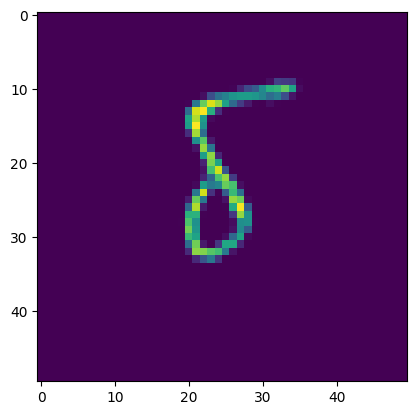

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_images[0])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.20, random_state=92)

X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 50, 50, 1).astype('float32')

In [11]:
conv_model = Sequential()


conv_model.add(
    Conv2D(50, (4, 4), 
           input_shape=(50, 50,1),
           activation='relu', 
           name="firstConv"
    )
)

conv_model.add(
    MaxPooling2D(pool_size=(2, 2), 
                 name="FirstPool"
                )
)

In [12]:
conv_model.add(
    Conv2D(100, (3, 3), 
           activation='relu', 
           name="SecondConv"
          )
)

conv_model.add(
    MaxPooling2D(
        pool_size=(2, 2),
        name="SecondPool")
)

In [13]:
conv_model.add(Dropout(0.2))

In [14]:
conv_model.add(Flatten())


conv_model.add(
    Dense(128,
          activation='relu',
          name="dense_1"
         )
)
conv_model.add(
    Dense(50, 
          activation='relu', 
          name="dense_2"
         )
)


conv_model.add(
    Dense(36, 
          activation='softmax', 
          name="modeloutput"
         )
)

conv_model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firstConv (Conv2D)          (None, 47, 47, 50)        850       
                                                                 
 FirstPool (MaxPooling2D)    (None, 23, 23, 50)        0         
                                                                 
 SecondConv (Conv2D)         (None, 21, 21, 100)       45100     
                                                                 
 SecondPool (MaxPooling2D)   (None, 10, 10, 100)       0         
                                                                 
 dropout (Dropout)           (None, 10, 10, 100)       0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               1

In [16]:
print(X_train.shape, y_train.shape)

(64170, 50, 50, 1) (64170, 36)


In [18]:
result = conv_model.fit(X_train, y_train, validation_split=0.10, epochs=10, batch_size=92,verbose=1)

Epoch 1/10
628/628 [==============================] - 366s 582ms/step - loss: 0.6232 - accuracy: 0.8137 - val_loss: 0.5058 - val_accuracy: 0.8487
Epoch 2/10
628/628 [==============================] - 328s 522ms/step - loss: 0.3799 - accuracy: 0.8826 - val_loss: 0.4015 - val_accuracy: 0.8808
Epoch 3/10
628/628 [==============================] - 324s 516ms/step - loss: 0.2652 - accuracy: 0.9155 - val_loss: 0.3323 - val_accuracy: 0.9037
Epoch 4/10
628/628 [==============================] - 326s 519ms/step - loss: 0.1924 - accuracy: 0.9404 - val_loss: 0.3549 - val_accuracy: 0.8967
Epoch 5/10
628/628 [==============================] - 325s 517ms/step - loss: 0.1500 - accuracy: 0.9518 - val_loss: 0.3326 - val_accuracy: 0.9101
Epoch 6/10
628/628 [==============================] - 328s 522ms/step - loss: 0.1224 - accuracy: 0.9596 - val_loss: 0.3451 - val_accuracy: 0.9121
Epoch 7/10
628/628 [==============================] - 326s 519ms/step - loss: 0.1021 - accuracy: 0.9661 - val_loss: 0.3124 -

In [19]:
scores = conv_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.69%


In [20]:
conv_model.save('drive/MyDrive/kyrg/conv_model.hdf5')

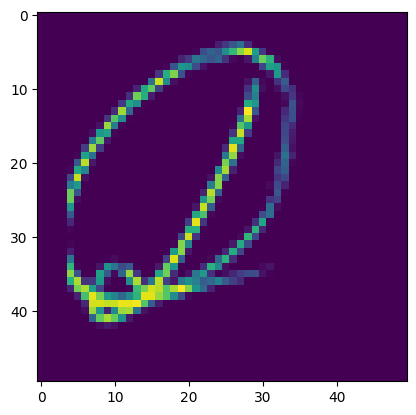

1/1 [==============================] - 0s 38ms/step


5

In [22]:
num = 2522
plt.imshow(X_images[num])
plt.show()


imgTrans = X_images[num].reshape(1,50,50,1)
imgTrans.shape

predictions = conv_model.predict(imgTrans)
binencoder.classes_[np.argmax(predictions)]

# TEST

In [25]:
dft = pd.read_csv('drive/MyDrive/kyrg/test.csv')

In [26]:
imageidx = dft['id']
dft.drop('id',axis=1,inplace=True)

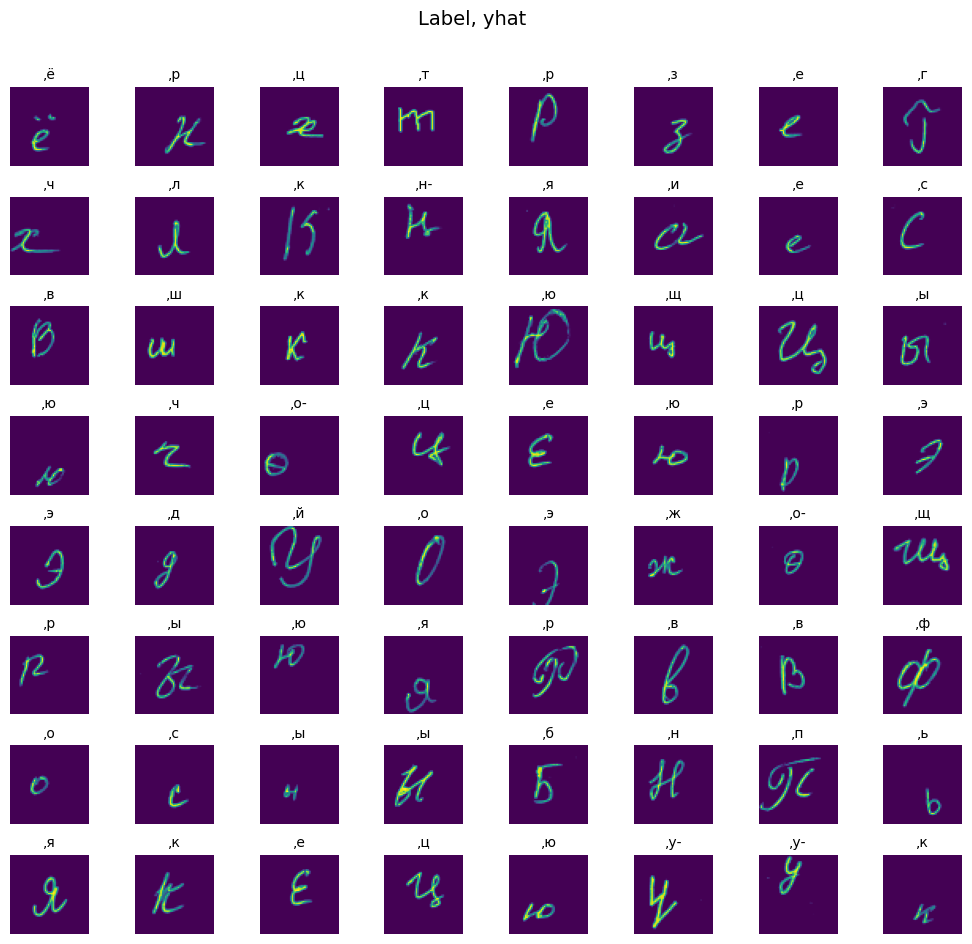

In [38]:
m, n = dft.shape
alph = 'а,б,в,г,д,е,ё,ж,з,и,й,к,л,м,н,н-,о,о-,п,р,с,т,у,у-,ф,х,ц,ч,ш,щ,ъ,ы,ь,э,ю,я'
alph = alph.split(',')
fig, axes = plt.subplots(8,8, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(8000)
    
    # Select rows corresponding to the random indices and
    # reshape the image

    testx = dft.iloc[random_index]
    testx = testx/255*1.15
    # Display the image
    ax.imshow(np.asarray(testx).reshape((50,50)))#, cmap='gray'

    prediction = conv_model.predict(np.asarray(testx).reshape(1,50,50,1),verbose=None)
    

    yhat = binencoder.classes_[np.argmax(prediction)]
    
    # Display the label above the image
    # print(yhat)
    ax.set_title(f",{alph[yhat-1]}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [ ]:
labels = []
for i in range(dft.shape[0]):
    # letter = letters[i]
    # letter = np.where(letter > 5, 255, 0)
    testx = dft.iloc[i]
    testx = testx/255
    prediction = conv_model.predict(np.asarray(testx).reshape(1,50,50,1),verbose=None)
    yhat = binencoder.classes_[np.argmax(prediction)]
    labels.append(yhat-1)
    if i%1000==0:
      print(i,'is done')

In [34]:
si = pd.Series(imageidx)
si

0       276f619c
1       8ced6677
2       af549c74
3       59170e1b
4       ac25b7f0
          ...   
8899    7ee547cf
8900    dfc2f44d
8901    543715a7
8902    47d51e67
8903    0c042f16
Name: id, Length: 8904, dtype: object

In [35]:
sp = pd.Series(labels)
sp = sp+1
sp

0       21
1       11
2       21
3       31
4       19
        ..
8899     2
8900    29
8901    34
8902     7
8903    15
Length: 8904, dtype: int64

In [36]:
result = pd.DataFrame()
result.shape
result['id']=si
result['label'] = sp
result.to_csv('sumbissions3.csv', columns = ['id','label'],index=False)